In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt
import seaborn as sns

# Sample documents
documents = [
    "본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라 일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다. 본 발명에 따르 면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회 전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하 여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성되 는 짐벌 카메라 모듈; 상기 회전 모터와 신관 어셈블리 모듈 및 짐벌 카메라 모듈에 대한 작동 전원의 공급 및 동작을 제어하는 제어 모듈; 및 상기 장치 하우징에 구비되며, 상기 제어 모듈에 전력을 공급하는 배터리 모듈; 을 포함하는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치가 제공된다.",
    "제1항에 있어서, 상기 로터 모듈은 중앙 허브(hub)에 연결되는 로터(rotor)가 그 기단부(proximal end portion)를 축으로 접철 가능하게 구성되는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치.",
    # "Supervised learning, unsupervised learning, and reinforcement learning are types of machine learning algorithms.",
    # "Natural language processing (NLP) is a field of study focused on making sense of human language using statistics and algorithms.",
]


# Define additional stopwords
# additional_stopwords = [
#     "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
#     "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
#     "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
#     "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
#     "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
#     "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
#     "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
#     "at", "by", "for", "with", "about", "against", "between", "into", "through", 
#     "during", "before", "after", "above", "below", "to", "from", "up", "down", 
#     "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", 
#     "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", 
#     "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", 
#     "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", 
#     "don", "should", "now"
# ]

# Combine additional stopwords with the default English stopwords
# stopwords = text.ENGLISH_STOP_WORDS.union(additional_stopwords)


stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과",
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다"
]

# stopwords = text.ENGLISH_STOP_WORDS.union(additional_stopwords)



# Create the TF-IDF vectorizer with stopwords removed
tfidf_vectorizer = TfidfVectorizer(stop_words=list(stopwords))

# Fit the vectorizer to the documents and transform the documents into TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

# Display the feature names
print("\nFeature Names:")
print(feature_names)


# Convert TF-IDF matrix to array
tfidf_array = tfidf_matrix.toarray()

# Create heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(tfidf_array, cmap="YlGnBu", xticklabels=feature_names, yticklabels=["Document {}".format(i+1) for i in range(len(documents))], annot=True, fmt=".2f")
# plt.title("TF-IDF Matrix")
# plt.xlabel("Words")
# plt.ylabel("Documents")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
import numpy as np
import operator

# 한국어 형태소 분석기
okt = Okt()

# TF-IDF 벡터화기 초기화
tfidf_vectorizer = TfidfVectorizer()

# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과",
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = [
  "본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라 일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다. 본 발명에 따르 면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회 전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하 여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성되 는 짐벌 카메라 모듈; 상기 회전 모터와 신관 어셈블리 모듈 및 짐벌 카메라 모듈에 대한 작동 전원의 공급 및 동작을 제어하는 제어 모듈; 및 상기 장치 하우징에 구비되며, 상기 제어 모듈에 전력을 공급하는 배터리 모듈; 을 포함하는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치가 제공된다.",
    "제1항에 있어서, 상기 로터 모듈은 중앙 허브(hub)에 연결되는 로터(rotor)가 그 기단부(proximal end portion)를 축으로 접철 가능하게 구성되는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치.",
]

# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 벡터화
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 벡터화 결과 확인
print("TF-IDF 행렬 크기:", tfidf_matrix.shape)
print("단어 목록:", feature_names)

###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = feature_names[most_important_word_index]

# Display the most important word
print("The most important word is:", most_important_word)


###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(feature_names, mean_tfidf_scores.tolist()[0]):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


aaa = {feature_names[i]:score for i,score in enumerate(mean_tfidf_scores.tolist()[0])}

sorted(aaa.items(), reverse=True, key=operator.itemgetter(1))
aaa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def getPairsOfTfidf(documents):
    
    additional_stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself",    "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", 
    "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", 
    "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", 
    "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", 
    "don", "should", "now"
    ]
    
    # Combine additional stopwords with the default English stopwords
    stopwords = text.ENGLISH_STOP_WORDS.union(additional_stopwords)

    # Create the TF-IDF vectorizer with stopwords removed
    tfidf_vectorizer = TfidfVectorizer(stop_words=list(stopwords))

    # Fit the vectorizer to the documents and transform the documents into TF-IDF vectors
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Get the feature names (words)
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Display the TF-IDF matrix
    print("TF-IDF Matrix:")
    print(tfidf_matrix.toarray())

    # Display the feature names
    print("\nFeature Names:")
    print(feature_names)

    # Convert TF-IDF matrix to array
    tfidf_array = tfidf_matrix.toarray()# Create heatmap

    ####

    # Calculate the mean TF-IDF score for each word across all documents
    mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

    # Find the index of the word with the highest mean TF-IDF score
    most_important_word_index = np.argmax(mean_tfidf_scores)

    # Get the most important word using the index
    most_important_word = feature_names[most_important_word_index]

    # Display the most important word
    print("The most important word is:", most_important_word)

    #####

    plt.figure(figsize=(10, 6))
    sns.heatmap(tfidf_array, cmap="YlGnBu", xticklabels=feature_names, yticklabels=["Document {}".format(i+1) for i in range(len(documents))], annot=True, fmt=".2f")
    plt.title("TF-IDF Matrix")
    plt.xlabel("Words")
    plt.ylabel("Documents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



bb = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

getPairsOfTfidf(bb)

In [ ]:
import numpy as np

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = feature_names[most_important_word_index]

# Display the most important word
print("The most important word is:", most_important_word)


In [ ]:
# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(feature_names, mean_tfidf_scores.tolist()[0]):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


In [ ]:
aaa = {feature_names[i]:score for i,score in enumerate(mean_tfidf_scores.tolist()[0])}
aaa

In [ ]:
import operator

sorted(aaa.items(),reverse=True, key=operator.itemgetter(1))
aaa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
import numpy as np
import operator

# 한국어 형태소 분석기
from konlpy.tag import Okt
okt = Okt()

# TF-IDF 벡터화기 초기화
tfidf_vectorizer = TfidfVectorizer()

# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과",
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다", "있다", "상기","가능하다","특징"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = [
  "본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라 일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다. 본 발명에 따르 면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회 전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하 여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성되 는 짐벌 카메라 모듈; 상기 회전 모터와 신관 어셈블리 모듈 및 짐벌 카메라 모듈에 대한 작동 전원의 공급 및 동작을 제어하는 제어 모듈; 및 상기 장치 하우징에 구비되며, 상기 제어 모듈에 전력을 공급하는 배터리 모듈; 을 포함하는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치가 제공된다.",
    "제1항에 있어서, 상기 로터 모듈은 중앙 허브(hub)에 연결되는 로터(rotor)가 그 기단부(proximal end portion)를 축으로 접철 가능하게 구성되는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치.",
    "제1항 또는 제2항에 있어서, 상기 로터 모듈은 2개의 로터가 반대 방향으로 회전하는 동축반전식의 로터로 구성되며, 상기 로터의 기단부에서 로터를 펼침 방향으로 탄성 지지하는 탄성 부재를 더 포함하는 것을 특징으로 하는 휴대형 군사용 드론 폭탄 장치."
]

# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 벡터화
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 벡터화 결과 확인
print("TF-IDF 행렬 크기:", tfidf_matrix.shape)
print("단어 목록:", feature_names)

###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = feature_names[most_important_word_index]

# Display the most important word
print("The most important word is:", most_important_word)


###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(feature_names, mean_tfidf_scores.tolist()[0]):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


aaa = {feature_names[i]:score for i,score in enumerate(mean_tfidf_scores.tolist()[0])}

bbb = sorted(aaa.items(), reverse=True, key=operator.itemgetter(1))
bbb

In [9]:
import PyPDF2
import re

def pdf_to_sentences(pdf_path):
    sentences = []
    
    # PDF 파일 열기
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        
        # 각 페이지에 대해 반복
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            
            # 문장 분리를 위한 정규표현식
            sentence_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
            page_sentences = sentence_regex.split(text)
            
            # 각 문장에 대해 공백 제거 후 리스트에 추가
            for sentence in page_sentences:
                sentence = sentence.strip()
                if sentence:
                    sentences.append(sentence)
    
    return sentences

# PDF 파일 경로
pdf_path = "휴대형 군사용 드론 폭탄 장치.pdf"

# 문장별로 파싱된 리스트 가져오기
parsed_sentences = pdf_to_sentences(pdf_path)

# 결과 출력
for index, sentence in enumerate(parsed_sentences, start=1):
    print(f"{index}. {sentence}")


1. (19) 대한민국특허청(KR)
(12) 공개특허공보(A)(11) 공개번호   10-2022-0154301
(43) 공개일자   2022년11월22일
(51) 국제특허분류(Int.
2. Cl.)
     B64C 39/02 (2006.01)  B64C 27/10 (2006.01)
     B64C 27/50 (2006.01)  B64D 27/24 (2006.01)
     B64D 45/00 (2006.01)  B64D 47/02 (2006.01)
     B64D 47/08 (2006.01)  B64D 7/00 (2006.01)
     F42B 10/60 (2006.01)  F42C 13/04 (2006.01)
(52) CPC특허분류
     B64C 39/024 (2013.01)
     B64C 27/10 (2013.01)
(21) 출원번호       10-2021-0061422
(22) 출원일자       2021년05월12일
     심사청구일자   2021년05월12일 (71) 출원인
주식회사 에아가이아
강원도 춘천시 동내면 점말1길 78-30
(72) 발명자
김휘중
강원도 춘천시 동내면 점말1길 78-32
강민아
강원도 춘천시 동내면 점말1길 78-32
(뒷면에 계속)
(74) 대리인
특허법인 이노
전체 청구항 수 : 총 7 항
(54) 발명의 명칭 휴대형 군사용 드론 폭탄 장치
(57) 요 약
본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라
일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다.
3. 본 발명에 따르
면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회
전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하
여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성

In [6]:
list_output_sorted[0:10]

[('제어', 0.07047678991392062),
 ('로터', 0.06902010986090926),
 ('휴대', 0.05734562567187355),
 ('드론', 0.0564775403988463),
 ('폭탄', 0.0526807312449195),
 ('회전', 0.04009169847419087),
 ('모터', 0.03847564916507943),
 ('수용', 0.03567799436625568),
 ('살상', 0.034614069802941655),
 ('신관', 0.03247113945611324)]

In [7]:
aa = [e[0] for e in list_output_sorted[0:5]]
bb = [e[1] for e in list_output_sorted[0:5]]

print(aa)
print(bb)

['제어', '로터', '휴대', '드론', '폭탄']
[0.07047678991392062, 0.06902010986090926, 0.05734562567187355, 0.0564775403988463, 0.0526807312449195]


In [ ]:
# import matplotlib
# matplotlib.matplotlib_fname()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "NanumSquareR.otf"  # 한글 폰트의 경로를 지정해야 합니다.
fontprop = font_manager.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name())

# 주어진 데이터
# words = ['모터', '로터', '제어', '휴대', '신관', '회전', '드론', '살상', '폭탄', '수용']
# values = [0.06968381498925656, 0.05347435039438854, 0.04944952804451086, 0.06757659614897302, 0.035631609852213336, 0.03426036018388834, 0.03225032801257646, 0.05415086612373821, 0.03984777312892999, 0.0382443929733765]

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 막대 그래프 그리기
plt.figure(figsize=(6,4))
sns.barplot(x=aa, y=bb, palette="Blues_r")
# plt.xlabel('단어', fontproperties=fontprop)
plt.ylabel('값', fontproperties=fontprop)
plt.title('문서 추출 핵심 키워드 Top 5', fontproperties=fontprop)
plt.xticks(rotation=0, fontproperties=fontprop)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 두 서류
document1 = "Python은 간단하고 강력한 프로그래밍 언어입니다."
document2 = "파이썬은 간결하고 강력한 프로그래밍 언어입니다."

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([document1, document2])

# 코사인 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

print("두 서류의 유사도:", cosine_sim[0][0])


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


# # 예시 텍스트 데이터
# documents = [
#     "Machine learning is the future of technology",
#     "Python is a popular programming language for machine learning",
#     "Technology is advancing rapidly",
#     "Python programming language is easy to learn",
# ]

# # TF-IDF 계산
# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(documents)
# terms = vectorizer.get_feature_names_out()
terms = feature_names[0:20]

# TF-IDF 가중치로 네트워크 그래프 생성
G = nx.Graph()

# 각 단어를 노드로 추가
for i, term in enumerate(terms):
    G.add_node(term)

# TF-IDF 행렬에서 가중치가 0이 아닌 요소에 대해 엣지 추가
for i, j in zip(*tfidf_matrix.nonzero()):
    G.add_edge(terms[i], terms[j], weight=tfidf_matrix[i, j])

# 네트워크 맵 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 위치 결정

plt.figure(figsize=(10, 8))

# 엣지 가중치에 따라 두께 조절
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}, font_family=font_name, font_color='red')

plt.title('TF-IDF Weighted Network Map')
plt.axis('off')
plt.show()


IndexError: index 176 is out of bounds for axis 0 with size 20

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46280 (\N{HANGUL SYLLABLE DYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/version

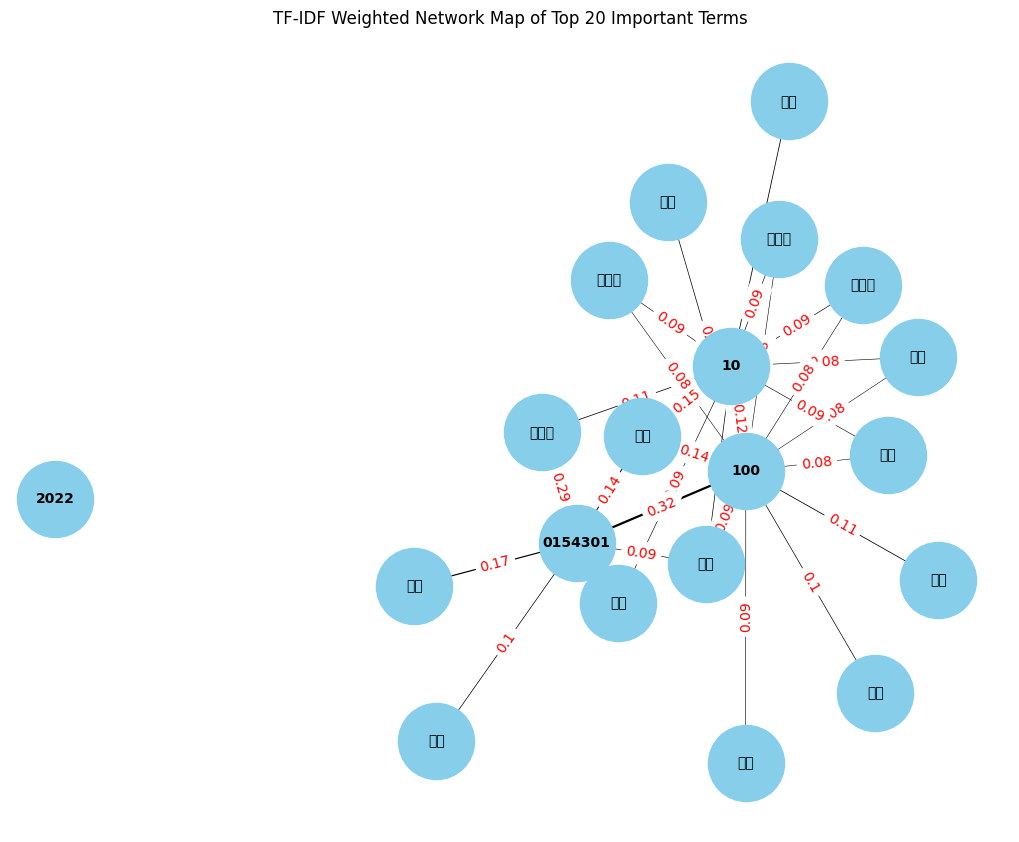

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(parsed_sentences)
terms = vectorizer.get_feature_names_out()

# 가장 높은 TF-IDF 값을 가진 상위 20개의 단어 선택
important_terms_indices = tfidf_matrix.sum(axis=0).A1.argsort()[-20:][::-1]
important_terms = [terms[i] for i in important_terms_indices]

# TF-IDF 가중치로 네트워크 그래프 생성
G = nx.Graph()

# 중요한 단어를 노드로 추가
for term in important_terms:
    G.add_node(term)

# TF-IDF 행렬에서 가중치가 0이 아닌 요소에 대해 엣지 추가
for i, j in zip(*tfidf_matrix.nonzero()):
    if terms[i] in important_terms and terms[j] in important_terms:
        G.add_edge(terms[i], terms[j], weight=tfidf_matrix[i, j])

# 네트워크 맵 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 위치 결정

plt.figure(figsize=(10, 8))

# 엣지 가중치에 따라 두께 조절
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}, font_color='red')

plt.title('TF-IDF Weighted Network Map of Top 20 Important Terms')
plt.axis('off')
plt.show()


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.font_manager as fm

# 한글 폰트 설정
# font_path = '/Users/basecamp/repo/milipat/app/ai/NanumGothic.ttf'  # 한글 폰트 파일 경로를 설정하세요
# fontprop = fm.FontProperties(fname=font_path)

# 예시 텍스트 데이터
# documents = [
#     "Machine learning is the future of technology",
#     "Python is a popular programming language for machine learning",
#     "Technology is advancing rapidly",
#     "Python programming language is easy to learn",
# ]


# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    "아니다", "나타나다",
    "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우", "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용", "주식회사", "청구항", "설명", "상태", "전체", "특허법",
    "모듈", "장치", "도면", "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100","0154301"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = parsed_sentences
# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 계산
vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(parsed_sentences)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)
terms = vectorizer.get_feature_names_out()

# 가장 높은 TF-IDF 값을 가진 상위 20개의 단어 선택
important_terms_indices = tfidf_matrix.sum(axis=0).A1.argsort()[-20:][::-1]
important_terms = [terms[i] for i in important_terms_indices]

# TF-IDF 가중치로 네트워크 그래프 생성
G = nx.Graph()

# 중요한 단어를 노드로 추가
for term in important_terms:
    G.add_node(term)

# TF-IDF 행렬에서 가중치가 0이 아닌 요소에 대해 엣지 추가
for i, j in zip(*tfidf_matrix.nonzero()):
    if terms[i] in important_terms and terms[j] in important_terms:
        G.add_edge(terms[i], terms[j], weight=tfidf_matrix[i, j])

# 네트워크 맵 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 위치 결정

plt.figure(figsize=(10, 8))

# 엣지 가중치에 따라 두께 조절
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights, font_family='NanumGothic')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}, font_color='red', font_family='NanumGothic')

plt.title('TF-IDF Weighted Network Map of Top 20 Important Terms', fontproperties=fontprop)
plt.axis('off')
plt.show()


NotFittedError: Vocabulary not fitted or provided

In [10]:
terms

array(['가능', '가능성', '가다', '가이아', '가지', '가지다', '각각', '간단하다', '간이', '감소',
       '강민아', '강원도', '갖다', '같이', '개발', '개방', '개별', '개시', '개폐', '거나'],
      dtype=object)

In [30]:
{(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

{('상기', '0154301'): 0.14,
 ('상기', '10'): 0.15,
 ('상기', '100'): 0.14,
 ('모듈', '0154301'): 0.09,
 ('모듈', '10'): 0.1,
 ('모듈', '100'): 0.09,
 ('장치', '0154301'): 0.24,
 ('장치', '10'): 0.09,
 ('제어', '0154301'): 0.17,
 ('드론', '10'): 0.08,
 ('드론', '100'): 0.08,
 ('발명의', '10'): 0.09,
 ('발명의', '100'): 0.08,
 ('폭탄', '10'): 0.09,
 ('폭탄', '100'): 0.08,
 ('휴대형', '10'): 0.09,
 ('휴대형', '100'): 0.08,
 ('로터', '100'): 0.1,
 ('10', '100'): 0.12,
 ('10', '또는'): 0.11,
 ('10', '하우징'): 0.11,
 ('10', '군사용'): 0.09,
 ('실시', '100'): 0.1,
 ('있다', '100'): 0.09,
 ('군사용', '100'): 0.08,
 ('0154301', '100'): 0.32,
 ('0154301', '신관'): 0.1,
 ('0154301', '하우징'): 0.29,
 ('100', '예에'): 0.11}

In [37]:
def convert_to_ts_format(graph_data):
    nodes = []
    edges = []

    # 노드와 엣지 정보 추출
    for edge, weight in graph_data.items():
        source, target = edge
        weight_label = f"{weight:.2f}"

        # 노드 추가
        if source not in [node['id'] for node in nodes]:
            nodes.append({"id": source, "label": source})
        if target not in [node['id'] for node in nodes]:
            nodes.append({"id": target, "label": target})

        # 엣지 추가
        edge_id = f"{source}-{target}"
        edges.append({"source": source, "target": target, "id": edge_id, "label": weight_label})

    return {"nodes": nodes, "edges": edges}

graph_data = {
    ('상기', '0154301'): 0.14,
    ('상기', '10'): 0.15,
    ('상기', '100'): 0.14,
    ('모듈', '0154301'): 0.09,
    ('모듈', '10'): 0.1,
    ('모듈', '100'): 0.09,
    ('장치', '0154301'): 0.24,
    ('장치', '10'): 0.09,
    ('제어', '0154301'): 0.17,
    ('드론', '10'): 0.08,
    ('드론', '100'): 0.08,
    ('발명의', '10'): 0.09,
    ('발명의', '100'): 0.08,
    ('폭탄', '10'): 0.09,
    ('폭탄', '100'): 0.08,
    ('휴대형', '10'): 0.09,
    ('휴대형', '100'): 0.08,
    ('로터', '100'): 0.1,
    ('10', '100'): 0.12,
    ('10', '또는'): 0.11,
    ('10', '하우징'): 0.11,
    ('10', '군사용'): 0.09,
    ('실시', '100'): 0.1,
    ('있다', '100'): 0.09,
    ('군사용', '100'): 0.08,
    ('0154301', '100'): 0.32,
    ('0154301', '신관'): 0.1,
    ('0154301', '하우징'): 0.29,
    ('100', '예에'): 0.11
}

aaa = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

ts_formatted_data = convert_to_ts_format(aaa)
print(ts_formatted_data)


{'nodes': [{'id': '상기', 'label': '상기'}, {'id': '0154301', 'label': '0154301'}, {'id': '10', 'label': '10'}, {'id': '100', 'label': '100'}, {'id': '모듈', 'label': '모듈'}, {'id': '장치', 'label': '장치'}, {'id': '제어', 'label': '제어'}, {'id': '드론', 'label': '드론'}, {'id': '발명의', 'label': '발명의'}, {'id': '폭탄', 'label': '폭탄'}, {'id': '휴대형', 'label': '휴대형'}, {'id': '로터', 'label': '로터'}, {'id': '또는', 'label': '또는'}, {'id': '하우징', 'label': '하우징'}, {'id': '군사용', 'label': '군사용'}, {'id': '실시', 'label': '실시'}, {'id': '있다', 'label': '있다'}, {'id': '신관', 'label': '신관'}, {'id': '예에', 'label': '예에'}], 'edges': [{'source': '상기', 'target': '0154301', 'id': '상기-0154301', 'label': '0.14'}, {'source': '상기', 'target': '10', 'id': '상기-10', 'label': '0.15'}, {'source': '상기', 'target': '100', 'id': '상기-100', 'label': '0.14'}, {'source': '모듈', 'target': '0154301', 'id': '모듈-0154301', 'label': '0.09'}, {'source': '모듈', 'target': '10', 'id': '모듈-10', 'label': '0.10'}, {'source': '모듈', 'target': '100', 'id': '모듈-100', 'labe

In [49]:
ts_formatted_data["nodes"]

[{'id': '상기', 'label': '상기'},
 {'id': '0154301', 'label': '0154301'},
 {'id': '10', 'label': '10'},
 {'id': '100', 'label': '100'},
 {'id': '모듈', 'label': '모듈'},
 {'id': '장치', 'label': '장치'},
 {'id': '제어', 'label': '제어'},
 {'id': '드론', 'label': '드론'},
 {'id': '발명의', 'label': '발명의'},
 {'id': '폭탄', 'label': '폭탄'},
 {'id': '휴대형', 'label': '휴대형'},
 {'id': '로터', 'label': '로터'},
 {'id': '또는', 'label': '또는'},
 {'id': '하우징', 'label': '하우징'},
 {'id': '군사용', 'label': '군사용'},
 {'id': '실시', 'label': '실시'},
 {'id': '있다', 'label': '있다'},
 {'id': '신관', 'label': '신관'},
 {'id': '예에', 'label': '예에'}]

In [1]:
import PyPDF2
import re

def pdf_to_sentences(pdf_path):
    sentences = []
    
    # PDF 파일 열기
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        
        # 각 페이지에 대해 반복
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            
            # 문장 분리를 위한 정규표현식
            sentence_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
            page_sentences = sentence_regex.split(text)
            
            # 각 문장에 대해 공백 제거 후 리스트에 추가
            for sentence in page_sentences:
                sentence = sentence.strip()
                if sentence:
                    sentences.append(sentence)
    
    return sentences

# PDF 파일 경로
pdf_path = "휴대형 군사용 드론 폭탄 장치.pdf"

# 문장별로 파싱된 리스트 가져오기
parsed_sentences = pdf_to_sentences(pdf_path)

# 결과 출력
for index, sentence in enumerate(parsed_sentences, start=1):
    print(f"{index}. {sentence}")


1. (19) 대한민국특허청(KR)
(12) 공개특허공보(A)(11) 공개번호   10-2022-0154301
(43) 공개일자   2022년11월22일
(51) 국제특허분류(Int.
2. Cl.)
     B64C 39/02 (2006.01)  B64C 27/10 (2006.01)
     B64C 27/50 (2006.01)  B64D 27/24 (2006.01)
     B64D 45/00 (2006.01)  B64D 47/02 (2006.01)
     B64D 47/08 (2006.01)  B64D 7/00 (2006.01)
     F42B 10/60 (2006.01)  F42C 13/04 (2006.01)
(52) CPC특허분류
     B64C 39/024 (2013.01)
     B64C 27/10 (2013.01)
(21) 출원번호       10-2021-0061422
(22) 출원일자       2021년05월12일
     심사청구일자   2021년05월12일 (71) 출원인
주식회사 에아가이아
강원도 춘천시 동내면 점말1길 78-30
(72) 발명자
김휘중
강원도 춘천시 동내면 점말1길 78-32
강민아
강원도 춘천시 동내면 점말1길 78-32
(뒷면에 계속)
(74) 대리인
특허법인 이노
전체 청구항 수 : 총 7 항
(54) 발명의 명칭 휴대형 군사용 드론 폭탄 장치
(57) 요 약
본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라
일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다.
3. 본 발명에 따르
면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회
전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하
여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import re
import numpy as np
import operator

# 한국어 형태소 분석기
okt = Okt()

# TF-IDF 벡터화기 초기화
tfidf_vectorizer = TfidfVectorizer()

# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    "아니다", "나타나다",
    "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우", "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용", "주식회사", "청구항", "설명", "상태", "전체", "특허법",
    "모듈", "장치", "도면", "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100","0154301"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = parsed_sentences
# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 벡터화
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# TF-IDF 벡터화 결과 확인
print("TF-IDF 행렬 크기:", tfidf_matrix.shape)
print("단어 목록:", feature_names)

###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Find the index of the word with the highest mean TF-IDF score
most_important_word_index = np.argmax(mean_tfidf_scores)

# Get the most important word using the index
most_important_word = feature_names[most_important_word_index]

# Display the most important word
print("The most important word is:", most_important_word)


###

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf_scores = np.mean(tfidf_matrix, axis=0)

# Iterate over each word and its mean TF-IDF score
for word, score in zip(feature_names, mean_tfidf_scores.tolist()[0]):
    print(f"Word: {word}, Mean TF-IDF Score: {score}")


list_output = {feature_names[i]:score for i,score in enumerate(mean_tfidf_scores.tolist()[0])}

list_output_sorted = sorted(list_output.items(), reverse=True, key=operator.itemgetter(1))
# list_output_sorted

TF-IDF 행렬 크기: (81, 447)
단어 목록: ['가능' '가능성' '가다' '가이아' '가지' '가지다' '각각' '간단하다' '간이' '감소' '강민아' '강원도' '갖다'
 '같이' '개발' '개방' '개별' '개시' '개폐' '거나' '거리' '것이므' '결합' '결합부' '경비' '경우' '경제성'
 '계속' '고리' '고정' '공간' '공격' '공고' '공급' '공보' '공이' '공지' '과제' '관계없이' '관련' '관리'
 '관점' '광범위하다' '광활하다' '교전' '교체' '구동' '구성요소' '구조' '구체' '구현' '국제' '군사훈련' '권리'
 '균등' '극대' '근거' '근거리' '기능' '기단' '기반' '기상' '기술' '기재' '긴급' '김선' '김선재' '김휘'
 '꺼내다' '날다' '내부' '내용' '내지' '널리' '년대' '년월' '농업' '높이' '뇌관' '다각형' '다르다' '다른'
 '다양하다' '다음' '단계' '단말' '단면' '단부' '단수' '단위' '단자' '단지' '달성' '대가' '대다' '대리인'
 '대상' '대신' '대체' '대체로' '대하' '대한' '대한민국' '대해' '더욱' '도공' '도록' '도모' '도시' '돌기'
 '동내면' '동성' '동시' '동일하다' '동작' '되게' '드론' '등록' '디케이터' '따라서' '따른' '또한' '라인'
 '레버' '로부터' '로서' '로터' '말다' '맞다' '매우' '명료하다' '명백하다' '명세서' '명확하다' '모두' '모드'
 '모든' '모터' '목적' '몸체' '무선' '무인' '무인항공기' '문맥' '문제점' '문헌' '미리' '민간' '바닥'
 '바람직하다' '바로' '반대' '반면' '반전' '받다' '발명자' '방향' '배제' '배터리' '번호' '범위' '변경'
 '변형' '복수' '부가' '부르다' '부상' '부여' '부와' '부의' '부재' '부착' '부터' '부품' '부피' '부호'
 '분류' '분야' '불과하다' '불

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/basecamp/.pyenv/versions/3.8.16/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(by

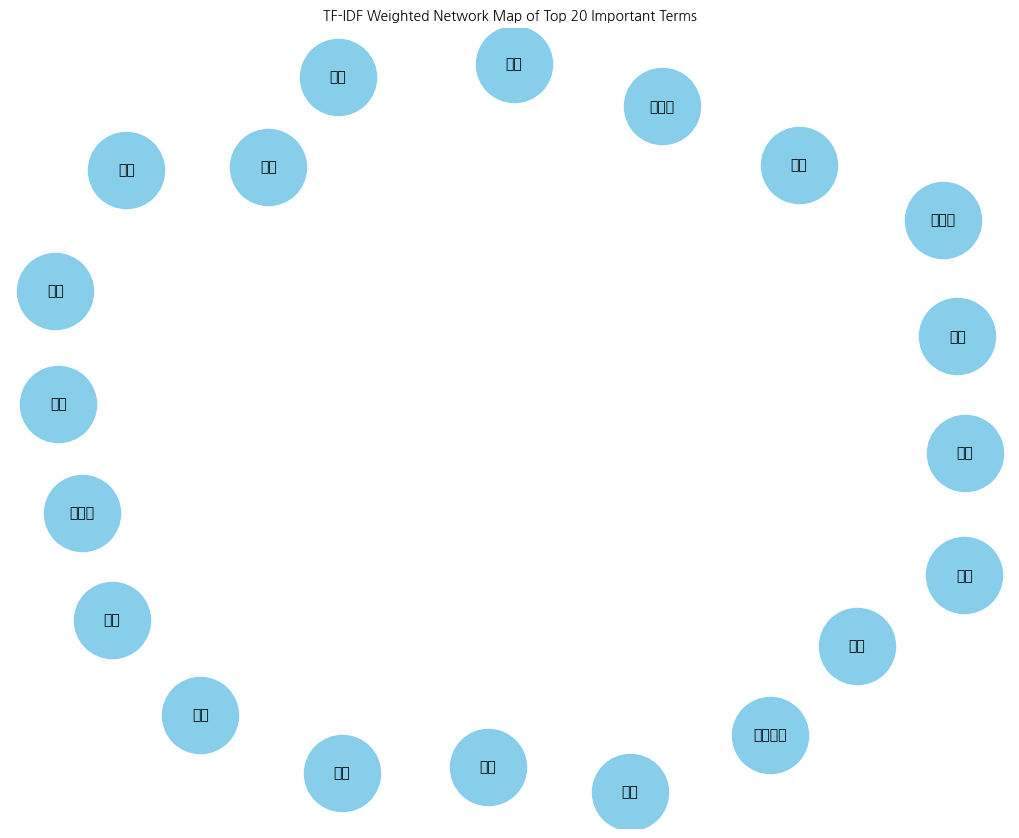

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = '/Users/basecamp/repo/milipat/app/ai/NanumGothic.ttf'  # 한글 폰트 파일 경로를 설정하세요
fontprop = fm.FontProperties(fname=font_path)

# 예시 텍스트 데이터
documents = [
    "Machine learning is the future of technology",
    "Python is a popular programming language for machine learning",
    "Technology is advancing rapidly",
    "Python programming language is easy to learn",
]

# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(parsed_sentences)


# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    "아니다", "나타나다",
    "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우", "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용", "주식회사", "청구항", "설명", "상태", "전체", "특허법",
    "모듈", "장치", "도면", "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100","0154301"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = parsed_sentences
# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 벡터화
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

terms = feature_names

# 가장 높은 TF-IDF 값을 가진 상위 20개의 단어 선택
important_terms_indices = tfidf_matrix.sum(axis=0).A1.argsort()[-20:][::-1]
important_terms = [terms[i] for i in important_terms_indices]

# TF-IDF 가중치로 네트워크 그래프 생성
G = nx.Graph()

# 중요한 단어를 노드로 추가
for term in important_terms:
    G.add_node(term)

# TF-IDF 행렬에서 가중치가 0이 아닌 요소에 대해 엣지 추가
for i, j in zip(*tfidf_matrix.nonzero()):
    if terms[i] in important_terms and terms[j] in important_terms:
        G.add_edge(terms[i], terms[j], weight=tfidf_matrix[i, j])

# 네트워크 맵 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 위치 결정

plt.figure(figsize=(10, 8))

# 엣지 가중치에 따라 두께 조절
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights, font_family='NanumGothic')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}, font_color='red', font_family='NanumGothic')

plt.title('TF-IDF Weighted Network Map of Top 20 Important Terms', fontproperties=fontprop)
plt.axis('off')
plt.show()


In [2]:
import PyPDF2
import re

def pdf_to_sentences(pdf_path):
    sentences = []
    
    # PDF 파일 열기
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        
        # 각 페이지에 대해 반복
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text = page.extract_text()
            
            # 문장 분리를 위한 정규표현식
            sentence_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')
            page_sentences = sentence_regex.split(text)
            
            # 각 문장에 대해 공백 제거 후 리스트에 추가
            for sentence in page_sentences:
                sentence = sentence.strip()
                if sentence:
                    sentences.append(sentence)
    
    return sentences

# PDF 파일 경로
pdf_path = "휴대형 군사용 드론 폭탄 장치.pdf"

# 문장별로 파싱된 리스트 가져오기
parsed_sentences = pdf_to_sentences(pdf_path)

# 결과 출력
for index, sentence in enumerate(parsed_sentences, start=1):
    print(f"{index}. {sentence}")


1. (19) 대한민국특허청(KR)
(12) 공개특허공보(A)(11) 공개번호   10-2022-0154301
(43) 공개일자   2022년11월22일
(51) 국제특허분류(Int.
2. Cl.)
     B64C 39/02 (2006.01)  B64C 27/10 (2006.01)
     B64C 27/50 (2006.01)  B64D 27/24 (2006.01)
     B64D 45/00 (2006.01)  B64D 47/02 (2006.01)
     B64D 47/08 (2006.01)  B64D 7/00 (2006.01)
     F42B 10/60 (2006.01)  F42C 13/04 (2006.01)
(52) CPC특허분류
     B64C 39/024 (2013.01)
     B64C 27/10 (2013.01)
(21) 출원번호       10-2021-0061422
(22) 출원일자       2021년05월12일
     심사청구일자   2021년05월12일 (71) 출원인
주식회사 에아가이아
강원도 춘천시 동내면 점말1길 78-30
(72) 발명자
김휘중
강원도 춘천시 동내면 점말1길 78-32
강민아
강원도 춘천시 동내면 점말1길 78-32
(뒷면에 계속)
(74) 대리인
특허법인 이노
전체 청구항 수 : 총 7 항
(54) 발명의 명칭 휴대형 군사용 드론 폭탄 장치
(57) 요 약
본 발명은 소형으로 제작하여 용이하게 휴대할 수 있고, 신속하게 사용할 수 있으며, 근거리의 적군뿐만 아니라
일정 거리 이상의 적군 측으로 날려 정밀 공격할 수 있는 휴대형 드론 폭탄 장치에 관한 것이다.
3. 본 발명에 따르
면, 장치 하우징; 상기 장치 하우징에 구비되는 회전 모터; 상기 장치 하우징의 상단부에서 상기 회전 모터의 회
전축에 연결되어 구비되는 로터 모듈; 상기 장치 하우징에 구비되며, 하기 제어 모듈의 제어 신호의 의해 기폭하
여 폭발하는 신관 어셈블리 모듈을 포함하는 살상 수단; 상기 장치 하우징에 구비되어 영상을 촬영하도록 구성

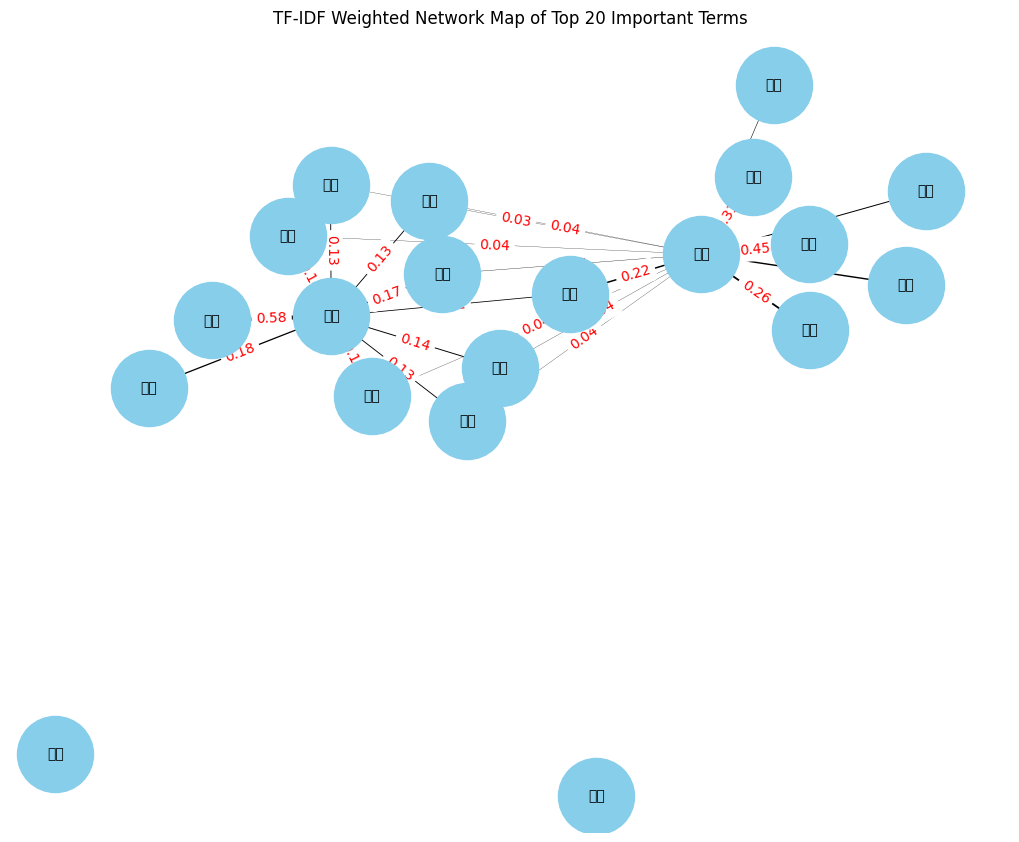

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.font_manager as fm
from konlpy.tag import Okt
okt = Okt()

# 한글 폰트 설정
# font_path = '/Users/basecamp/repo/milipat/app/ai/NanumGothic.ttf'  # 한글 폰트 파일 경로를 설정하세요
# fontprop = fm.FontProperties(fname=font_path)

# 예시 텍스트 데이터
# documents = [
#     "Machine learning is the future of technology",
#     "Python is a popular programming language for machine learning",
#     "Technology is advancing rapidly",
#     "Python programming language is easy to learn",
# ]


# 불용어 리스트
stopwords = [
    "은", "는", "이", "가", "을", "를", "에", "에서", "으로", "와", "과"
    "이다", "하다", "것", "그", "이렇다", "그렇다", "되다", "같다",
    # 
    # "아니다", "나타나다",
    # "있다", "상기", "가능하다","특징", "보다", "특허", "발명", "또는", "하우", "되어다", "공개", "따르다", "이다", "포함", "실시", "구성", "청구", "사용", "주식회사", "청구항", "설명", "상태", "전체", "특허법",
    # "모듈", "장치", "도면", "구비" , "명칭", "심사", "나타내다", "바라보다", "의하다", "늘다", "10", "100","0154301"
]

# 전처리 및 토큰화 함수
def preprocess(text):
    # 한글, 공백을 제외한 모든 문자 제거
    text = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)
    # 형태소 분석 및 불용어 처리
    tokens = okt.morphs(text, stem=True)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

# 예시 문서
documents = parsed_sentences
# 문서 전처리
preprocessed_documents = [preprocess(doc) for doc in documents]

# TF-IDF 계산
tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(parsed_sentences)
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_documents)
terms = tfidf_vectorizer.get_feature_names_out()

# 가장 높은 TF-IDF 값을 가진 상위 20개의 단어 선택
important_terms_indices = tfidf_matrix.sum(axis=0).A1.argsort()[-20:][::-1]
important_terms = [terms[i] for i in important_terms_indices]

# TF-IDF 가중치로 네트워크 그래프 생성
G = nx.Graph()

# 중요한 단어를 노드로 추가
for term in important_terms:
    G.add_node(term)

# TF-IDF 행렬에서 가중치가 0이 아닌 요소에 대해 엣지 추가
for i, j in zip(*tfidf_matrix.nonzero()):
    if terms[i] in important_terms and terms[j] in important_terms:
        G.add_edge(terms[i], terms[j], weight=tfidf_matrix[i, j])

# 네트워크 맵 시각화
pos = nx.spring_layout(G, seed=42)  # 노드 위치 결정

plt.figure(figsize=(10, 8))

# 엣지 가중치에 따라 두께 조절
edges = G.edges()
weights = [G[u][v]['weight'] * 5 for u, v in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', width=weights)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}, font_color='red')

plt.title('TF-IDF Weighted Network Map of Top 20 Important Terms')
plt.axis('off')
plt.show()


In [12]:
G.edges()

EdgeView([('상기', '구성'), ('모듈', '구성'), ('장치', '공개'), ('장치', '구성'), ('로터', '구성'), ('도면', '공개'), ('제어', '구성'), ('보다', '공개'), ('보다', '구성'), ('발명', '공개'), ('발명', '구성'), ('하우', '구성'), ('사용', '공개'), ('사용', '구성'), ('드론', '공개'), ('드론', '구성'), ('휴대', '공개'), ('휴대', '구성'), ('구성', '실시'), ('구성', '구성'), ('구성', '포함'), ('구성', '폭탄'), ('폭탄', '공개'), ('실시', '공개'), ('설명', '공개')])

In [14]:
def convert_to_ts_format(graph_data):
    nodes = []
    edges = []

    # 노드와 엣지 정보 추출
    for edge, weight in graph_data.items():
        source, target = edge
        weight_label = f"{weight:.2f}"

        # 노드 추가
        if source not in [node['id'] for node in nodes]:
            nodes.append({"id": source, "label": source})
        if target not in [node['id'] for node in nodes]:
            nodes.append({"id": target, "label": target})

        # 엣지 추가
        edge_id = f"{source}-{target}"
        edges.append({"source": source, "target": target, "id": edge_id, "label": weight_label})

    return {"nodes": nodes, "edges": edges}


data = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

ts_formatted_data = convert_to_ts_format(data)
print(ts_formatted_data["nodes"])
print(ts_formatted_data["edges"])


[{'id': '상기', 'label': '상기'}, {'id': '구성', 'label': '구성'}, {'id': '모듈', 'label': '모듈'}, {'id': '장치', 'label': '장치'}, {'id': '공개', 'label': '공개'}, {'id': '로터', 'label': '로터'}, {'id': '도면', 'label': '도면'}, {'id': '제어', 'label': '제어'}, {'id': '보다', 'label': '보다'}, {'id': '발명', 'label': '발명'}, {'id': '하우', 'label': '하우'}, {'id': '사용', 'label': '사용'}, {'id': '드론', 'label': '드론'}, {'id': '휴대', 'label': '휴대'}, {'id': '실시', 'label': '실시'}, {'id': '포함', 'label': '포함'}, {'id': '폭탄', 'label': '폭탄'}, {'id': '설명', 'label': '설명'}]
[{'source': '상기', 'target': '구성', 'id': '상기-구성', 'label': '0.31'}, {'source': '모듈', 'target': '구성', 'id': '모듈-구성', 'label': '0.45'}, {'source': '장치', 'target': '공개', 'id': '장치-공개', 'label': '0.11'}, {'source': '장치', 'target': '구성', 'id': '장치-구성', 'label': '0.22'}, {'source': '로터', 'target': '구성', 'id': '로터-구성', 'label': '0.14'}, {'source': '도면', 'target': '공개', 'id': '도면-공개', 'label': '0.58'}, {'source': '제어', 'target': '구성', 'id': '제어-구성', 'label': '0.20'}, {'source': '보다